In [80]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])

In [81]:
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null category
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                      

# Analisis de los tipos de propiedades

In [83]:
df.sort_values('precio',ascending=False).head(6)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
174276,153761,wtc oficina en venta piso 17,excelente oficina en venta en torre world trad...,Oficina comercial,Montecito 38,Benito Juárez,Distrito Federal,10.0,NaN,0.0,...,23569.0,19.394686,-99.173403,2015-09-04,0.0,0.0,0.0,0.0,0.0,12525000.0
209858,181271,excelente condominio ubicado al sur de la ciud...,condominio tipo mexicano moderno de 3 casas ub...,Casa,Congreso 210,Tlalpan,Distrito Federal,0.0,3.0,NaN,...,24763.0,19.284337,-99.168128,2016-10-25,0.0,0.0,0.0,1.0,1.0,12521000.0
81715,64975,amsterdam town house dos niveles y terraza,proyecto de imanol legorreta y carlos duclaud ...,Apartamento,Amsterdam,Cuauhtémoc,Distrito Federal,5.0,3.0,3.0,...,23814.0,19.415568,-99.168934,2016-05-16,0.0,0.0,0.0,1.0,1.0,12520000.0
192956,279973,departamento en kansas . col nápoles,"edificio de 5 niveles con 9 departamentos, ofr...",Apartamento,Kansas 167,Benito Juárez,Distrito Federal,0.0,2.0,2.0,...,23573.0,19.386641,-99.180594,2016-11-04,0.0,0.0,0.0,1.0,1.0,12516000.0
232457,165404,excelente casa de lujo en venta en jardines de...,¡excelente oportunidad de inversión! nosotros ...,Casa,CASCADA #24,Alvaro Obregón,Distrito Federal,5.0,4.0,NaN,...,23384.0,19.326603,-99.199736,2014-07-29,1.0,0.0,0.0,1.0,1.0,12515000.0
75131,193788,pent house polanco a 1 cuadra de reforma.,<p>edificio en donde la prioridad es aprovecha...,Apartamento,"Polanco, Miguel Hidalgo, Distrito Federal, México",Miguel Hidalgo,Distrito Federal,0.0,NaN,3.0,...,275358.0,19.430314,-99.187108,2013-10-10,0.0,0.0,0.0,0.0,0.0,12500000.0


In [84]:
propiedades = df.dropna(subset=['tipodepropiedad'])
propiedades_counts = propiedades['tipodepropiedad'].value_counts()

Estoy dropiando propiedades y metros cuadrados NaN

In [85]:
propiedades = propiedades.dropna(subset=['metroscubiertos'])

Text(0, 0.5, 'Nombre de categoria')

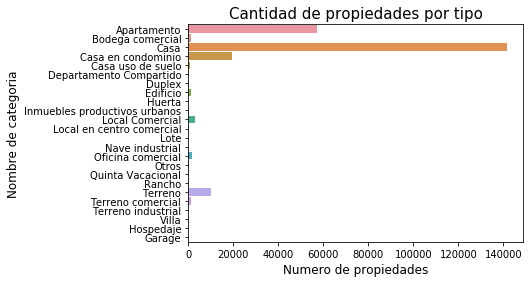

In [86]:
g = sns.barplot(x=propiedades_counts.values, y=propiedades_counts.index, orient='h')
g.set_title("Cantidad de propiedades por tipo", fontsize=15)
g.set_xlabel("Numero de propiedades", fontsize=12)
g.set_ylabel("Nombre de categoria", fontsize=12)

# Analisis en las casas y apartamentos

Text(0, 0.5, 'Cantidad de casas')

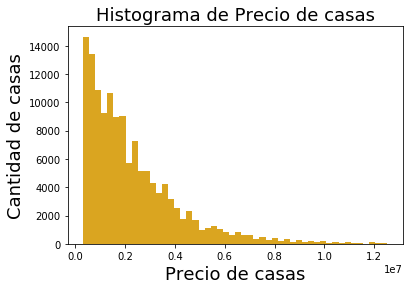

In [87]:
casas = propiedades[propiedades['tipodepropiedad'] == 'Casa']
g = casas['precio'].plot.hist(bins=50, color='goldenrod')
g.set_title("Histograma de Precio de casas", fontsize=18)
g.set_xlabel("Precio de casas",fontsize=18)
g.set_ylabel("Cantidad de casas", fontsize=18)

Text(0, 0.5, 'Cantidad de casas')

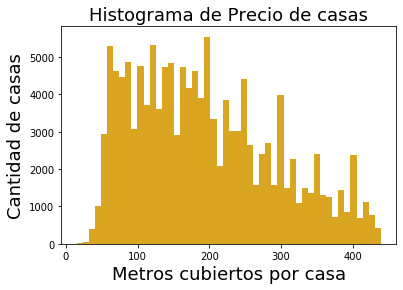

In [88]:
g = casas['metroscubiertos'].plot.hist(bins=50, color='goldenrod')
g.set_title("Histograma de Precio de casas", fontsize=18)
g.set_xlabel("Metros cubiertos por casa",fontsize=18)
g.set_ylabel("Cantidad de casas", fontsize=18)

Text(0, 0.5, 'Cantidad de apartamentos')

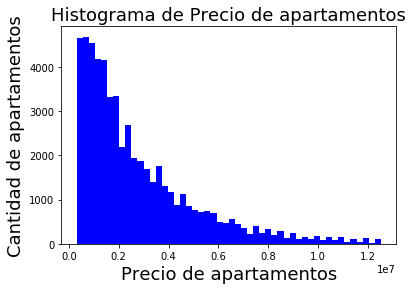

In [89]:
apartamentos = propiedades[propiedades['tipodepropiedad'] == 'Apartamento']
g = apartamentos['precio'].plot.hist(bins=50, color='blue')
g.set_title("Histograma de Precio de apartamentos", fontsize=18)
g.set_xlabel("Precio de apartamentos",fontsize=18)
g.set_ylabel("Cantidad de apartamentos", fontsize=18)

Text(0, 0.5, 'Cantidad de condominios')

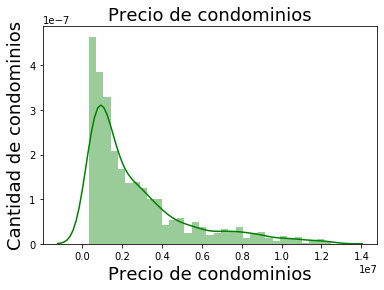

In [90]:
terreno = propiedades[propiedades['tipodepropiedad'] == 'Terreno']
g = sns.distplot(terreno['precio'], color='green', label='Terreno')
g.set_title("Precio de condominios", fontsize=18)
g.set_xlabel("Precio de condominios",fontsize=18)
g.set_ylabel("Cantidad de condominios", fontsize=18)

Text(0, 0.5, 'Cantidad de condominios')

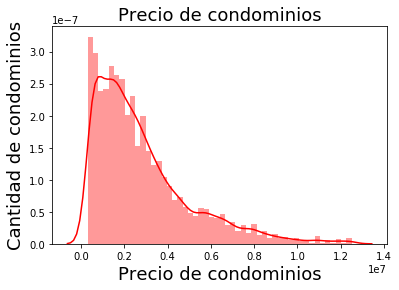

In [91]:
condominios = propiedades[propiedades['tipodepropiedad'] == 'Casa en condominio']
g = sns.distplot(condominios['precio'], color='red', label='Condominios')
g.set_title("Precio de condominios", fontsize=18)
g.set_xlabel("Precio de condominios",fontsize=18)
g.set_ylabel("Cantidad de condominios", fontsize=18)

Text(0.5, 1.0, 'Comparando las cantidades x precios')

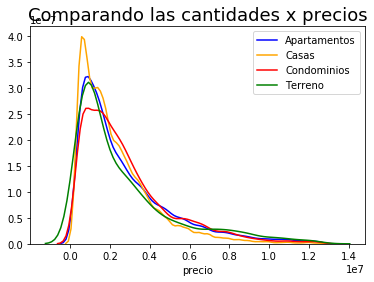

In [92]:
g = sns.distplot(apartamentos['precio'], color='blue', label='Apartamentos', hist=False)
g = sns.distplot(casas['precio'], color='orange', label='Casas', hist=False)
g = sns.distplot(condominios['precio'], color='red', label='Condominios', hist=False)
g = sns.distplot(terreno['precio'], color='green', label='Terreno',hist=False)
g.set_title("Comparando las cantidades x precios", fontsize=18)

Text(0.5, 1.0, 'Comparando las cantidades x precios')

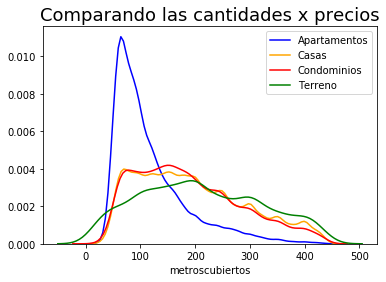

In [93]:
g = sns.distplot(apartamentos['metroscubiertos'], color='blue', label='Apartamentos', hist=False)
g = sns.distplot(casas['metroscubiertos'], color='orange', label='Casas', hist=False)
g = sns.distplot(condominios['metroscubiertos'], color='red', label='Condominios', hist=False)
g = sns.distplot(terreno['metroscubiertos'], color='green', label='Terreno',hist=False)
g.set_title("Comparando metros cubiertos", fontsize=18)

Text(0, 0.5, 'Latitud')

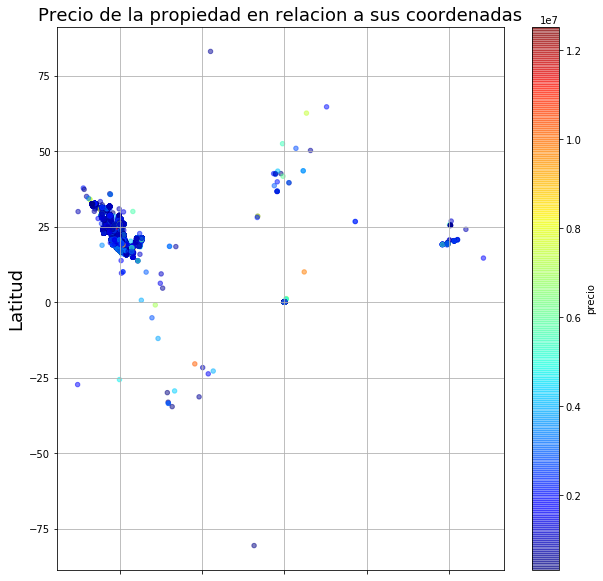

In [94]:
g = propiedades.plot(kind="scatter", x="lng", y="lat",
    c="precio", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.5, figsize=(10,10),grid=True)
g.set_title("Precio de la propiedad en relacion a sus coordenadas",fontsize=18)
g.set_xlabel("Longitud",fontsize=18)
g.set_ylabel("Latitud", fontsize=18)